### Q2. Perform the following preprocessing tasks on the dirty_iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruleset

In [2]:
df = pd.read_csv('dirty_iris.csv')

In [3]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


1. Calculate the number and percentage of observations that are complete.

In [4]:
df1 = df.dropna()
df1.reset_index(level=0, drop=True, inplace=True)
df1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,5.0,3.4,1.6,0.4,setosa
3,5.7,2.6,3.5,1.0,versicolor
4,5.9,3.0,5.1,1.8,virginica
...,...,...,...,...,...
91,6.3,2.9,5.6,1.8,virginica
92,5.7,2.5,5.0,2.0,virginica
93,6.7,3.1,5.6,2.4,virginica
94,5.6,3.0,4.5,1.5,versicolor


In [5]:
print('Number of complete records: {0}'.format(len(df1)))
print('Percentage of complete records: {0:.2f}%'
    .format(len(df1) * 100 / len(df)))

Number of complete records: 96
Percentage of complete records: 64.00%


2. Replace all the special values in data with NA.

In [6]:
df1.replace({'?': 'NA'})

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,5.0,3.4,1.6,0.4,setosa
3,5.7,2.6,3.5,1.0,versicolor
4,5.9,3.0,5.1,1.8,virginica
...,...,...,...,...,...
91,6.3,2.9,5.6,1.8,virginica
92,5.7,2.5,5.0,2.0,virginica
93,6.7,3.1,5.6,2.4,virginica
94,5.6,3.0,4.5,1.5,versicolor


3. Define these rules in a separate text file and read them.

In [7]:
rules = []
rules.append(ruleset.checkSpecies)
rules.append(ruleset.checkPositive)
rules.append(ruleset.checkPetalLength)
rules.append(ruleset.checkSepalLength)
rules.append(ruleset.checkSepalPetal)
rules

[<function ruleset.checkSpecies(df)>,
 <function ruleset.checkPositive(df)>,
 <function ruleset.checkPetalLength(df)>,
 <function ruleset.checkSepalLength(df)>,
 <function ruleset.checkSepalPetal(df)>]

4. Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.

In [8]:
df = df1

In [9]:
violations = {}
for i in range(len(rules)):
    rule, error = rules[i](df)
    violations[rule] = error

In [10]:
violations

{'Rule1': 0, 'Rule2': 1, 'Rule3': 2, 'Rule4': 1, 'Rule5': 4}

In [11]:
violationsSeries = pd.Series(violations)

In [12]:
violationsSeries

Rule1    0
Rule2    1
Rule3    2
Rule4    1
Rule5    4
dtype: int64

<Axes: title={'center': 'Number of violations in each rule'}, xlabel='Rules', ylabel='Number of violations'>

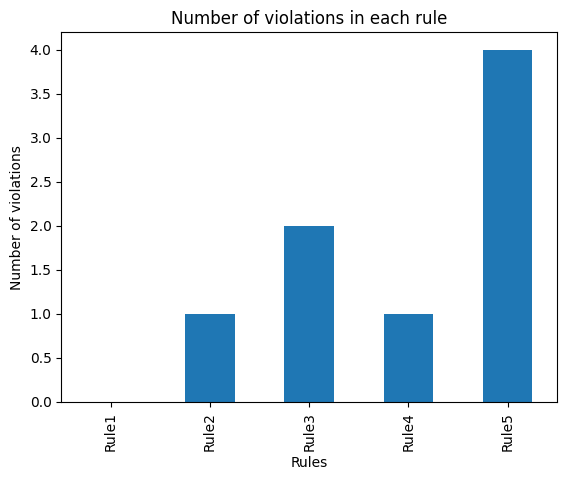

In [13]:
violationsSeries.plot(kind='bar', xlabel='Rules', ylabel='Number of violations',
    title='Number of violations in each rule')

5. Find outliers in sepal length using boxplot and boxplot.stats

<Axes: >

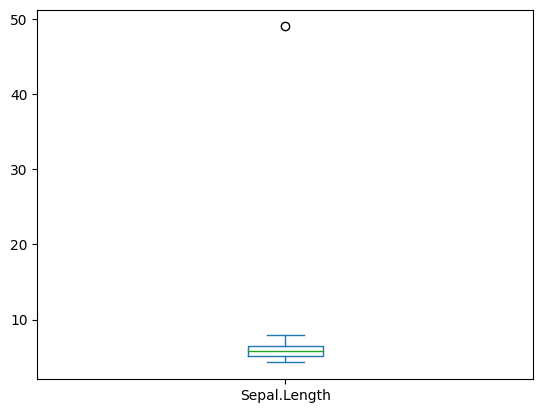

In [15]:
df['Sepal.Length'].plot(kind='box')